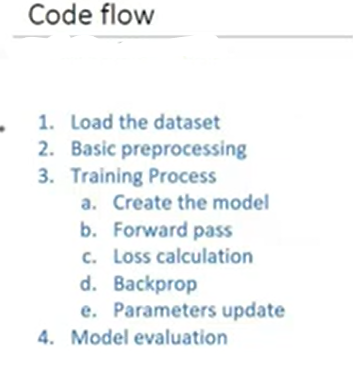

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 31)

### train_test split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=.2)

### Scaling

In [10]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [12]:
X_train

array([[-0.02539478,  1.91833958, -0.02657356, ..., -0.13615481,
        -1.04057884, -0.01101776],
       [-0.78814137, -0.14578544, -0.78708379, ..., -0.43573615,
         0.27071637, -0.91110198],
       [-0.45039381, -0.69928032, -0.44032053, ..., -0.45598649,
         0.42451025, -0.46925309],
       ...,
       [-1.35302418,  0.6590783 , -1.34868507, ..., -1.35983176,
        -0.74108549, -0.55411149],
       [-0.21397051,  2.78121152, -0.23242595, ..., -0.55615611,
        -1.12799852, -0.38907654],
       [-0.97953166, -0.98207028, -1.00233025, ..., -1.7561819 ,
        -0.29589267, -1.27335954]])

In [14]:
y_train

560    B
515    B
502    B
191    B
19     B
      ..
507    B
129    M
553    B
455    B
174    B
Name: diagnosis, Length: 455, dtype: object

### Label encoding

In [15]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [16]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

#### Numpy array to pytorch tensors

In [17]:
X_train_tensor=torch.from_numpy(X_train)
X_test_tensor=torch.from_numpy(X_test)
y_train_tensor=torch.from_numpy(y_train)
y_test_tensor=torch.from_numpy(y_test)

In [19]:
X_train_tensor.shape

torch.Size([455, 30])

In [21]:
y_train_tensor.shape

torch.Size([455])

### Defining the Model

In [39]:
class SimpleNN():

    def __init__(self,X):
        self.weights=torch.rand(X.shape[1],1,dtype=torch.float64,requires_grad=True)
        self.bias=torch.zeros(1,dtype=torch.float64,requires_grad=True)

    def forward(self,X):
        z=torch.matmul(X,self.weights)+self.bias
        y_pred=torch.sigmoid(z)
        return y_pred
        
    def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
     epsilon = 1e-7
     y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
     loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
     return loss

### major Parameters


In [43]:
learning_rate=.1
epochs=50

### Training Pipeline

In [44]:
# Create model
model=SimpleNN(X_train_tensor)

# define loops
for epoch in range(epochs):

    # forward pass
    y_pred=model.forward(X_train_tensor)

    # loss calculation
    loss=model.loss_function(y_pred,y_train_tensor)
   

    # backward pass
    loss.backward()

    # upadate weights
    with torch.no_grad():
        model.weights-=learning_rate*model.weights.grad
        model.bias-=learning_rate*model.bias.grad

    # zero gradients
    model.weights.grad.zero_()
    model.bias.grad.zero_()


    # print loss in each epoch
    print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.2107364076551654
Epoch: 2, Loss: 3.0615086469413852
Epoch: 3, Loss: 2.907276424822502
Epoch: 4, Loss: 2.750535843818298
Epoch: 5, Loss: 2.5851607225758517
Epoch: 6, Loss: 2.416087353226437
Epoch: 7, Loss: 2.240757348520354
Epoch: 8, Loss: 2.0629821284499767
Epoch: 9, Loss: 1.8892125412584682
Epoch: 10, Loss: 1.7167924015289522
Epoch: 11, Loss: 1.5500625142510176
Epoch: 12, Loss: 1.3906535144926357
Epoch: 13, Loss: 1.2456206450078793
Epoch: 14, Loss: 1.1179438365923233
Epoch: 15, Loss: 1.0103193648658582
Epoch: 16, Loss: 0.9243728152804164
Epoch: 17, Loss: 0.8598911967272964
Epoch: 18, Loss: 0.8144691411563567
Epoch: 19, Loss: 0.7838904206030503
Epoch: 20, Loss: 0.7635040978645801
Epoch: 21, Loss: 0.7495868330542371
Epoch: 22, Loss: 0.7396619087304572
Epoch: 23, Loss: 0.7322149269982482
Epoch: 24, Loss: 0.7263491492240094
Epoch: 25, Loss: 0.7215360534901105
Epoch: 26, Loss: 0.7174599118561845
Epoch: 27, Loss: 0.7139267201921063
Epoch: 28, Loss: 0.7108123491454971
Epoch

In [29]:
model.weights

tensor([[0.5751],
        [0.2047],
        [0.8060],
        [0.8830],
        [0.7595],
        [0.1267],
        [0.0391],
        [0.3728],
        [0.6506],
        [0.3402],
        [0.0758],
        [0.2855],
        [0.2524],
        [0.9552],
        [0.2878],
        [0.3645],
        [0.5220],
        [0.5005],
        [0.7704],
        [0.2463],
        [0.0385],
        [0.3707],
        [0.3141],
        [0.2995],
        [0.1203],
        [0.5898],
        [0.7286],
        [0.0645],
        [0.4103],
        [0.8646]], dtype=torch.float64, requires_grad=True)

In [45]:
model.bias

tensor([-0.3489], dtype=torch.float64, requires_grad=True)

### Evaluation

In [ ]:
# model evaluation

with torch.no_grad():
    y_pred=model.forward(X_test_tensor)
    y_pred = (y_pred > 0.9).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}')